## COVID-19 Data Visualizations

### Imports and manipulating the data

In [41]:
#!pip install plotly==4.9.0
#!pip install orca


In [42]:

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
from datetime import timedelta
import math
import plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
countries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
temp = df.drop(['Lat','Long'],axis=1).groupby(by='Country/Region').sum().reset_index()
countries = pd.melt(temp, id_vars=['Country/Region'], var_name='date', value_name='cases')
countries.columns = ['Country','Date','Confirmed']
countries.head()






,Country,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


### Method that cleans up date format and adds new columns

In [43]:
def clean_cols(df, rates=False, smooth_days=3):
    try:
        df['Date'] = pd.to_datetime(df.Date).dt.date
        df['EpidemicStartDate'] = df.sort_values(by='Date').loc[df.Confirmed!=0].Date.iloc[0]
        df['DaysElapsed'] = (df.Date - df.EpidemicStartDate).dt.days + 1
    except:
        print('Unable to convert dates properly!')
    df['NewConfirmed'] = df.Confirmed.diff(periods=1)
    df['OldConfirmed'] = df.Confirmed-df.NewConfirmed
    # Takes the natural log not log10 s
    df['DaysElapsed_Log'] = np.log(df.DaysElapsed)
    df['Confirmed_Log'] = np.log(df.Confirmed)
    df['NewConfirmed_Log'] = np.log(df.NewConfirmed)
    if rates:
        
        df['GrowthRate'] = df.NewConfirmed/df.NewConfirmed.shift(1)
        df['Ratio'] = df.Confirmed/df.Confirmed.shift(1)
        
        df['GrowthRate_Smooth'] = df.GrowthRate.rolling(smooth_days).sum()/smooth_days
        df['Ratio_Smooth'] = df.Ratio.rolling(smooth_days).sum()/smooth_days
    return df

In [44]:
cleaned_countries = countries.groupby('Country').apply(clean_cols)
cleaned_countries.head()
cleaned_countries[cleaned_countries["Country"]=="US"]


,Country,Date,Confirmed,EpidemicStartDate,DaysElapsed,NewConfirmed,OldConfirmed,DaysElapsed_Log,Confirmed_Log,NewConfirmed_Log
174,US,2020-01-22,1,2020-01-22,1,NaN,NaN,0.000000,0.000000,NaN
362,US,2020-01-23,1,2020-01-22,2,0.0,1.0,0.693147,0.000000,-inf
550,US,2020-01-24,2,2020-01-22,3,1.0,1.0,1.098612,0.693147,0.000000
738,US,2020-01-25,2,2020-01-22,4,0.0,2.0,1.386294,0.693147,-inf
926,US,2020-01-26,5,2020-01-22,5,3.0,2.0,1.609438,1.609438,1.098612
...,...,...,...,...,...,...,...,...,...,...
41346,US,2020-08-28,5913941,2020-01-22,220,46156.0,5867785.0,5.393628,15.592823,10.739782
41534,US,2020-08-29,5961094,2020-01-22,221,47153.0,5913941.0,5.398163,15.600765,10.761153
41722,US,2020-08-30,5996431,2020-01-22,222,35337.0,5961094.0,5.402677,15.606675,10.472686
41910,US,2020-08-31,6030587,2020-01-22,223,34156.0,5996431.0,5.407172,15.612355,10.438694


### Data Visualizations

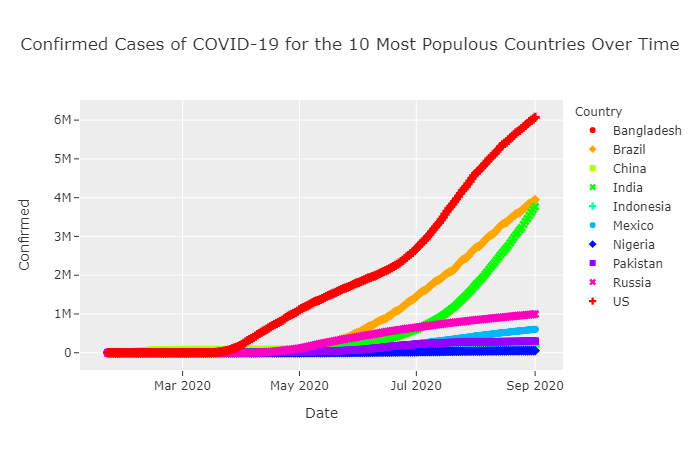

In [45]:

px.scatter(data_frame=cleaned_countries[cleaned_countries.Country.isin(['US',"China","India",'Indonesia','Brazil',"Pakistan",'Nigeria','Bangladesh','Russia','Mexico'])], 
           x='Date', y='Confirmed', color='Country', symbol='Country',color_discrete_sequence=px.colors.cyclical.HSV,
           #log_x=False,log_y=True, 
           title='Confirmed Cases of COVID-19 for the 10 Most Populous Countries Over Time', template='ggplot2', 
          )


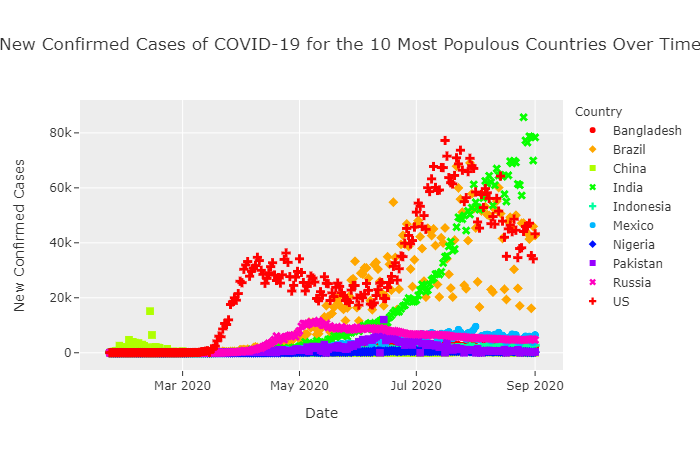

In [46]:
px.scatter(data_frame=cleaned_countries[cleaned_countries.Country.isin(['US',"China","India",'Indonesia','Brazil',"Pakistan",'Nigeria','Bangladesh','Russia','Mexico'])], 
           x='Date', y='NewConfirmed', color='Country', symbol='Country',color_discrete_sequence=px.colors.cyclical.HSV, labels = {'NewConfirmed' : 'New Confirmed Cases'},
           #log_x=False,log_y=True, 
           title='New Confirmed Cases of COVID-19 for the 10 Most Populous Countries Over Time', template='ggplot2', 
          )

In [47]:
cleaned_countries2 = countries.groupby('Country').apply(clean_cols,True)
cleaned_countries2.head()
ccusa=cleaned_countries2[cleaned_countries2["Country"]=="US"]
ccusa.fillna(0)

,Country,Date,Confirmed,EpidemicStartDate,DaysElapsed,NewConfirmed,OldConfirmed,DaysElapsed_Log,Confirmed_Log,NewConfirmed_Log,GrowthRate,Ratio,GrowthRate_Smooth,Ratio_Smooth
174,US,2020-01-22,1,2020-01-22,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
362,US,2020-01-23,1,2020-01-22,2,0.0,1.0,0.693147,0.000000,-inf,0.000000,1.000000,0.000000,0.000000
550,US,2020-01-24,2,2020-01-22,3,1.0,1.0,1.098612,0.693147,0.000000,inf,2.000000,0.000000,0.000000
738,US,2020-01-25,2,2020-01-22,4,0.0,2.0,1.386294,0.693147,-inf,0.000000,1.000000,0.000000,1.333333
926,US,2020-01-26,5,2020-01-22,5,3.0,2.0,1.609438,1.609438,1.098612,inf,2.500000,0.000000,1.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41346,US,2020-08-28,5913941,2020-01-22,220,46156.0,5867785.0,5.393628,15.592823,10.739782,1.004133,1.007866,1.067235,1.007799
41534,US,2020-08-29,5961094,2020-01-22,221,47153.0,5913941.0,5.398163,15.600765,10.761153,1.021601,1.007973,1.022611,1.007912
41722,US,2020-08-30,5996431,2020-01-22,222,35337.0,5961094.0,5.402677,15.606675,10.472686,0.749411,1.005928,0.925049,1.007256
41910,US,2020-08-31,6030587,2020-01-22,223,34156.0,5996431.0,5.407172,15.612355,10.438694,0.966579,1.005696,0.912530,1.006532


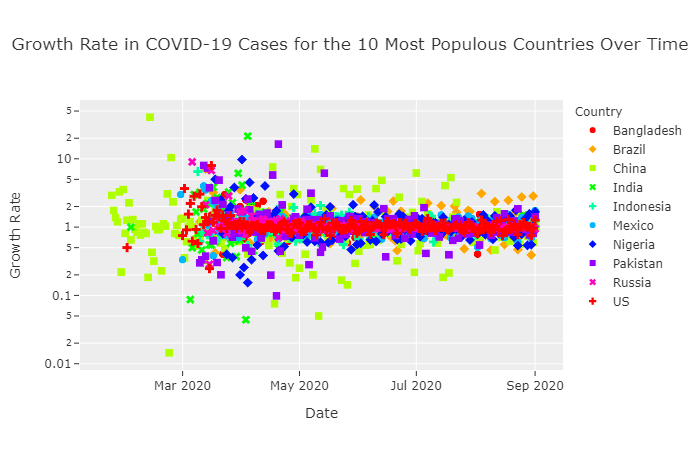

In [48]:
px.scatter(data_frame=cleaned_countries2[cleaned_countries2.Country.isin(['US',"China","India",'Indonesia','Brazil',"Pakistan",'Nigeria','Bangladesh','Russia','Mexico'])], 
           x='Date', y='GrowthRate', color='Country', symbol='Country',color_discrete_sequence=px.colors.cyclical.HSV,
           log_x=False,log_y=True, labels={'GrowthRate' : 'Growth Rate'},
           title='Growth Rate in COVID-19 Cases for the 10 Most Populous Countries Over Time', template='ggplot2', 
          )

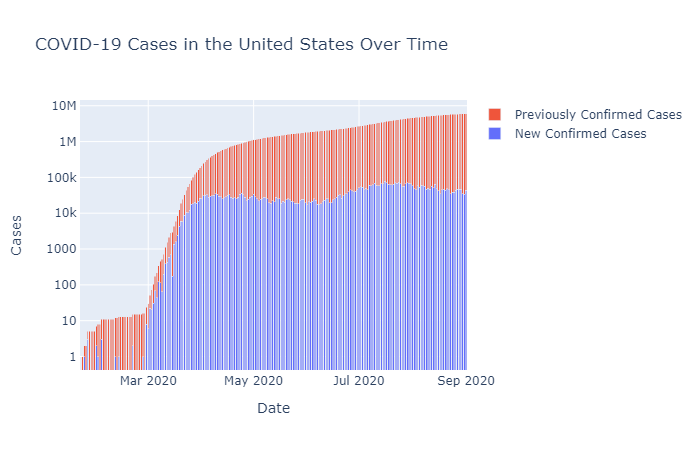

In [49]:
import plotly.graph_objects as go
plot = go.Figure(data=[go.Bar(name = 'New Confirmed Cases', x = ccusa.Date,y=ccusa.NewConfirmed),
       go.Bar(name = 'Previously Confirmed Cases', x = ccusa.Date, y=ccusa.OldConfirmed)]
                )
plot.update_layout(barmode='stack',yaxis_type='log',title = 'COVID-19 Cases in the United States Over Time',xaxis_title = 'Date',yaxis_title = 'Cases')
plot.show()